In [277]:
%pylab inline
import numpy as np
import scipy.stats as stats

np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


# Common Methods in scipy.stats


| Function | Arguments | Name | Description |
|:---------|:----------|:-----|:------------|
| rvs      | (size=None, randon_state=None)   | Random Variate | 해당 distribution을 따르는 랜덤값을 리턴 |
| pdf      | (x) | Probability Density Function | 특정값의 확률을 리턴 |
| ppf      | (q) | Percent Point Function | 확률을 입력하면 x값을 알아낼수 있음 |
| cdf      | (x) | cumulative distribution function | 해당 Distribution의 처음부터 x값까지의 면적값.. 즉 전체 확률 값 |
| sf       | (x) | Survival function | 1 - cdf(x) 와 동일함 |
| stats    | (moments='mvsk') | | mean ('m') , variance ('v') , skew ('s'), kurtosis ('k') |

자세한 내용은 [링크](https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html)를 참조

### Random Variate

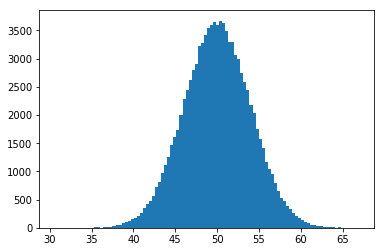

In [278]:
norm = stats.norm(50, scale=4)
hist(norm.rvs(size=100000), bins=100)
print()

### PDF, CDF and PPF

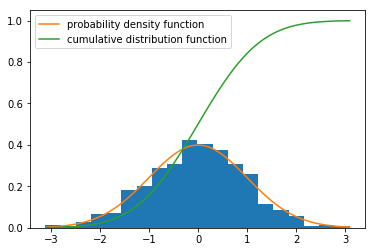

In [285]:
norm = stats.norm(0, 1)
x = norm.rvs(1000)
hist(x, bins=20, normed=True)

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plot(x, norm.pdf(x), label='probability density function')
plot(x, norm.cdf(x), label='cumulative distribution function')
legend()

### Stats

In [275]:
norm = stats.norm(50, 1)
mean, variance, skew, kurtosis = norm.stats(moments='mvsk')
print('mean:    ', mean)
print('variance:', variance)
print('skew:    ', skew)
print('kurtosis:', kurtosis)

mean:     50.0
variance: 1.0
skew:     0.0
kurtosis: 0.0


# Normal Distribution

1. mean값을 중심으로 symmetric shape을 갖고 있다. 
2. mean, median, 그리고 mode값 모두 동일하다 
3. curve아래의 모든 값을 합하면 1이다. 
4. 특정 $ x_i $의 값은 0이다.
5. 평균값이 높으면 우측으로 그래프가 이동(shift)하고, 평균값이 낮으면 왼쪽으로 이동(shift)한다.
6. Standard deviation값이 높을수록 그래프는 넓게 퍼져있고, 작을수록 커브의 모양이 좁아진다.

### Z-Score 

특정 $ x_i $ 의 값이 평균에서 standard deviation기준으로 몇단계나 떨어져 있는지 나타냄

$$ z_x = \frac{x - \mu}{\sigma} $$



### Probability Density Function For Normal Distribution


$$ f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{ - \frac{(x - \mu)^2}{2 \sigma^2}} $$

In [2]:
def normal_pdf(x, var, mean):
    """
    Probability Density Function for Normal Distribution
    """
    return 1/np.sqrt(2 * np.pi * var) * np.exp( -(x - mean)**2/(2*var))

norm = stats.norm(61, scale=4)
normal_pdf(65, var=norm.var(), mean=norm.mean()), norm.pdf(65)

(0.060492681129785841, 0.060492681129785841)

### Empirical Rule 

* 68%의 데이터가 1 STD안에 존재 
* 95%의 데이터가 2 STD안에 존재
* 99.7%의 데이터가 3 STD안에 존재

예를 들어 A학습의 시험점수는 normal distribution을 따르고 평균 84점, 표준편차는 4점일때 다음과 같이 구할수 있다.

In [92]:
norm = stats.norm(84, 4)
print('1 STD: {0:.2}%'.format(norm.cdf(84 + 4) - norm.cdf(84 - 4)))
print('2 STD: {0:.2}%'.format(norm.cdf(84 + 8) - norm.cdf(84 - 8)))
print('3 STD: {0:.2}%'.format(norm.cdf(84 + 12) - norm.cdf(84 - 12)))

1 STD: 0.68%
2 STD: 0.95%
3 STD: 1.0%


### Normal Distribution in Scipy

scipy.stats.norm 을 사용하면 됩니다.<br>
stats.norm(mean, standard deviation)

| Function | Arguments | Description |
|:---------|:----------|:------------|
| pdf      | (x, loc=0, scale=1) | Probability Density Function <br>특정값의 확률을 리턴 |
| ppf      | (q, loc=0, scale=1) | Percent Point Function <br> 확률을 입력하면 x값을 알아낼수 있음 |
| cdf      | (x, loc=0, scale=1) | cumulative distribution function <br>해당 Distribution의 처음부터 x값까지의 면적값.. 즉 전체 확률 값 |

## 문제 A

자동차 Checkpoint 지점에서 자동차의 속도는 normal distributed 되어있으며, 평균속도는 시간당 $ \mu = 61 $ miles 이고 표준편차 $ \sigma = 4 $ 이다. <br>

#### **문제1**. 이때 시간당 65 miles이하로 체크포인트를 지나가는 자동차들의 확률은? (답. 0.8413 )

<span style="color:#777777">
cdf(x, loc=0, scale=1) (Cumulative distribution function)을 이용하면 답을 구할수 있다.
</span>

In [3]:
norm = stats.norm(61, scale=4)
norm.cdf(65)

0.84134474606854293

위의 답을 그래프로 그리면 다음과 같습니다.

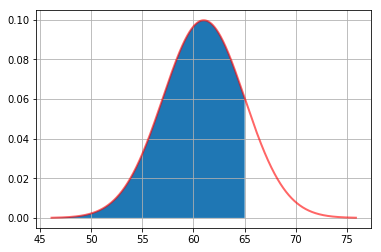

In [4]:
def fill_dist(dist: stats.norm, start=None, end=None):
    if start is None:
        start = dist.ppf(0.0001)
    if end is None:
        end = dist.ppf(0.9999)
    
    # Plot Distribution
    x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 10000)
    plot(x, dist.pdf(x), 'r-', lw=2, alpha=0.6, label='norm pdf')
    
    # Fill Part of the Distribution
    x2 = np.linspace(start, end, 10000)
    y2 = norm.pdf(x2)
    y2[0] = 0
    y2[-1] = 0
    fill(x2, y2)
    grid()
    
norm = stats.norm(61, scale=4)
fill_dist(norm, end=65)

#### 문제 4. 시간당 66 miles 속도 이상으로 체크포인트를 지나가는 자동차들의 확률은? (답. 0.1056)

0.105649773667 0.105649773667


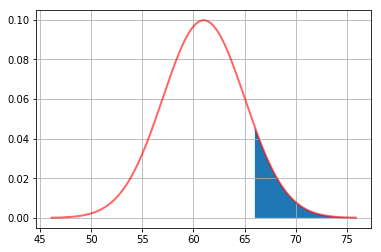

In [5]:
print(1 - norm.cdf(66), norm.sf(66))

norm = stats.norm(61, scale=4)
fill_dist(norm, start=66, end=norm.ppf(0.9999))

0.30853753872598688

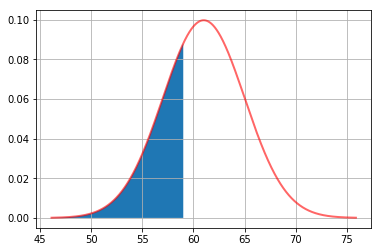

In [6]:
fill_dist(norm, end=59)
norm.cdf(59)

#### **문제3**. 시간당 65 miles속도의  z-score를 구하라 (답. 1)


In [7]:
def zscore(dist, value):
    return (value - norm.mean())/norm.std()
zscore(norm, 65)

1.0

# Exponential Distribution

# Student's T Distribution

Normal Distribution이 전체 population을 나타낸다면, T-Distribution은 sample을 설명합니다.<br>
따라서 sample size가 커지면 커질수록 Normal Distribution을 유사하게 따라가게 됩니다.

### Probability Density Function for T

$$ f(x, v) = \frac{ \Gamma\left(\frac{v+1}{2} \right)} {\sqrt{v \pi} \Gamma\left( \frac{v}{2} \right)} 
\left( 1+ \frac{x^2}{v} \right)^{-\frac{v+1}{2}} $$

* $ v $ 는 degrees of freedom 
* $ \Gamma $ 는 [Gamma Function](https://en.wikipedia.org/wiki/Gamma_function)

[None, None, None, None]

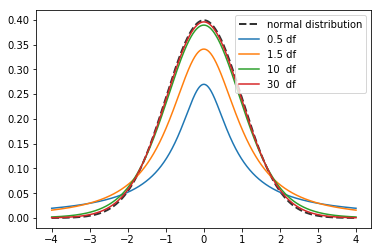

In [97]:
def t_plot(df):
    mean, var, skew, kurt = stats.t.stats(df, moments='mvsk')
    x = np.linspace(-4, 4, 10000)

    plot(x, stats.t.pdf(x, df), '-', lw=1.5, label=f'{df:<3} df')
    legend()

# Plot Normal Distribution for comparison
norm = stats.norm(0, 1)
x = np.linspace(-4, 4, 10000)
plot(x, norm.pdf(x), '--', lw=2, color='#333333', label='normal distribution')

# Plot T-Distributions with several degrees of freedom
[t_plot(df) for df in [0.5, 1.5, 10, 30]]